# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Finished Loading Data")

Finished Loading Data


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES** 
---

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:

import numpy as np

n_train = X_train.shape[0]

n_validation = X_valid.shape[0]

n_test = X_test.shape[0]

image_shape = X_train[0].shape

n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

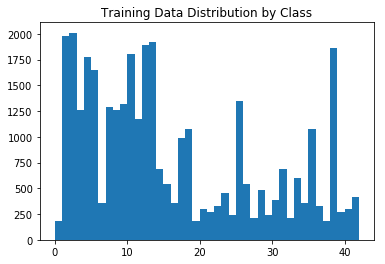

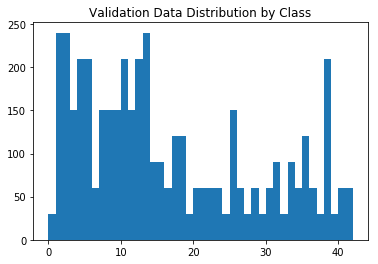

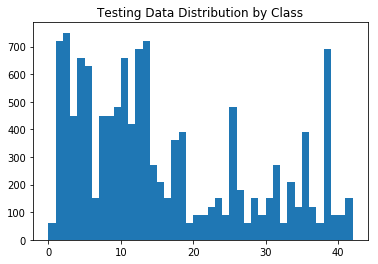

7


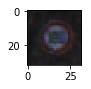

In [3]:

import matplotlib.pyplot as plt
%matplotlib inline

import random

# Distributions
binwidth = 1
plt.hist(y_train, bins=np.arange(min(y_train), max(y_train) + binwidth, binwidth))
plt.title("Training Data Distribution by Class")
plt.show()
plt.hist(y_valid, bins=np.arange(min(y_valid), max(y_valid) + binwidth, binwidth))
plt.title("Validation Data Distribution by Class")
plt.show()
plt.hist(y_test, bins=np.arange(min(y_test), max(y_test) + binwidth, binwidth))
plt.title("Testing Data Distribution by Class")
plt.show()

# Example image

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])




----

## Step 2: Design and Test a Model Architecture


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
# Shuffle data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


# Normalize Data
X_train = (X_train - 128)/128


print("Finished Preprocessing Data")


Finished Preprocessing Data


### Model Architecture

In [5]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

def LeNet(x):    
    conv1_W = tf.get_variable("conv1_W", shape = [5, 5, 3, 6], initializer = tf.contrib.layers.xavier_initializer())
    conv1_b = tf.get_variable("conv1_b", shape = [6], initializer = tf.contrib.layers.xavier_initializer())
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.get_variable("conv2_W", shape = [5, 5, 6, 16], initializer = tf.contrib.layers.xavier_initializer())
    conv2_b = tf.get_variable("conv2_b", shape = [16], initializer = tf.contrib.layers.xavier_initializer())
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   =  tf.contrib.layers.flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.get_variable("fc1_W", shape = [400, 120], initializer = tf.contrib.layers.xavier_initializer())
    fc1_b = tf.get_variable("fc1_b", shape = [120], initializer = tf.contrib.layers.xavier_initializer())
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.get_variable("fc2_W", shape = [120, 84], initializer = tf.contrib.layers.xavier_initializer())
    fc2_b = tf.get_variable("fc2_b", shape = [84], initializer = tf.contrib.layers.xavier_initializer())
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W = tf.get_variable("fc3_W", shape = [84, n_classes], initializer = tf.contrib.layers.xavier_initializer())
    fc3_b = tf.get_variable("fc3_b", shape = [n_classes], initializer = tf.contrib.layers.xavier_initializer())
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

def dnn(x):
    
    y = LeNet(x)
    
    return y

print("Finished Defining DNN")

Finished Defining DNN


### Train, Validate and Test the Model

In [6]:
# Helper Definitions

print(tf.__version__)

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = dnn(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

print("Finished Loading Graph")

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train & Validate

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        saver.save(sess, 'model')
        
    saver.save(sess, 'model')
    print("Model saved")
    
    print("Testing...")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


0.12.1
Finished Loading Graph
Training...

EPOCH 1 ...
Validation Accuracy = 0.099

EPOCH 2 ...
Validation Accuracy = 0.317

EPOCH 3 ...
Validation Accuracy = 0.506

EPOCH 4 ...
Validation Accuracy = 0.517

EPOCH 5 ...
Validation Accuracy = 0.547

EPOCH 6 ...
Validation Accuracy = 0.571

EPOCH 7 ...
Validation Accuracy = 0.567

EPOCH 8 ...
Validation Accuracy = 0.595

EPOCH 9 ...
Validation Accuracy = 0.572

EPOCH 10 ...
Validation Accuracy = 0.602

EPOCH 11 ...
Validation Accuracy = 0.607

EPOCH 12 ...
Validation Accuracy = 0.597

EPOCH 13 ...
Validation Accuracy = 0.605

EPOCH 14 ...
Validation Accuracy = 0.666

EPOCH 15 ...
Validation Accuracy = 0.607

EPOCH 16 ...
Validation Accuracy = 0.585

EPOCH 17 ...
Validation Accuracy = 0.626

EPOCH 18 ...
Validation Accuracy = 0.578

EPOCH 19 ...
Validation Accuracy = 0.609

EPOCH 20 ...
Validation Accuracy = 0.660

EPOCH 21 ...
Validation Accuracy = 0.662

EPOCH 22 ...
Validation Accuracy = 0.603

EPOCH 23 ...
Validation Accuracy = 0.648



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
eval_file = "eval.p"
with open(eval_file, mode='rb') as f:
    eval_data = pickle.load(f)
    
X_data, y_data = eval_data['features'], eval_data['labels']

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.

# Normalize Data
X_data = (X_data - 128)/128

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.